In [0]:
#stats/housekeeping 
import numpy as np
import pandas as pd
#ML packages
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical
from keras.regularizers import l2
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedShuffleSplit
#visualization
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [0]:
(X_trainval, y_trainval), (X_test, y_test) = fashion_mnist.load_data() #load the dataset

In [0]:
#defining the MNIST fashion dictionary
LABEL_DICT = {
 0: "T-shirt/top",
 1: "Trouser",
 2: "Pullover",
 3: "Dress",
 4: "Coat",
 5: "Sandal",
 6: "Shirt",
 7: "Sneaker",
 8: "Bag",
 9: "Ankle boot"
}

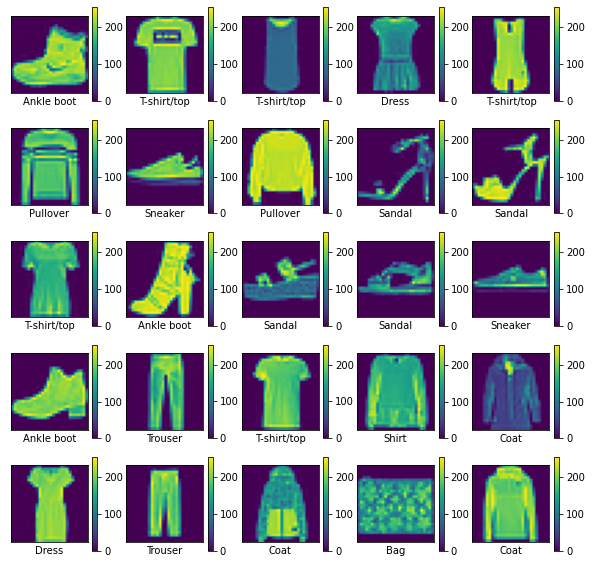

In [0]:
#Image before rescaling 
#notice the 'ankle boot' image in the (0,0) position
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.colorbar()
    plt.xlabel(LABEL_DICT[y_train[i]])
plt.show()

In [0]:
#number of samples
num_train = X_trainval.shape[0]
num_test = X_test.shape[0]
#reshape 
X_trainval = X_trainval.reshape(num_train, 28*28).astype('float32')
X_test = X_test.reshape(num_test, 28*28).astype('float32')
#normalize
X_trainval=X_trainval / 255.0
X_test = X_test / 255.0 
# OHE
y_trainval = keras.utils.to_categorical(y_trainval, 10)
y_test = keras.utils.to_categorical(y_test, 10)

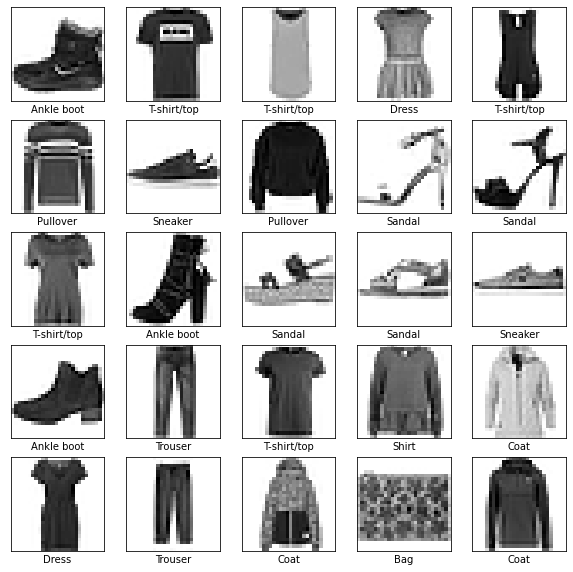

In [0]:
#Image after rescaling 
#notice the difference in the 'ankle boot' image in the (0,0) position
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(LABEL_DICT[y_train[i]])
plt.show()

In [0]:
#taking 10,000 samples as a validation set for model selection
sss = StratifiedShuffleSplit(n_splits=5, train_size=(X_trainval.shape[0]-10000), test_size=1000, random_state=0)
train, validate = next(sss.split(X=X_trainval, y=y_trainval))
X_train,y_train  = X_trainval[train] , y_trainval[train]
X_val,y_val  = X_trainval[validate] , y_trainval[validate]
print('train set dimentions:',X_train.shape,y_train.shape)
print('train set dimentions:',X_val.shape,y_val.shape)


train set dimentions: (50000, 784) (50000, 10)
train set dimentions: (1000, 784) (1000, 10)


# Gridsearch for Optimal parameters (Vanilla Model)

In this section we will perform 2 gridsearches on a smaller random dataset of 10,000 (9000 train 1000 test) taken from the X_test. The first will be for the most basic model, meaning that we will tune hyperparameters internal to the sequential model (hidden layer size, kernal regularization). The second gridsearch will be done with that tuned-basic-model to find the optimal batch size. 

In [0]:
def make_mlp(hidden_size_1=32, hidden_size_2=32, l2_1=0.01, l2_2=0.01):
  mnist_model = Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #flatten (28,28) matrix
    # Iput 784, output hidden_size_1
    Dense(hidden_size_1, activation='relu', kernel_regularizer=l2(l2_1)),
    # Input hidden_size_1, output hidden_size_2
    Dense(hidden_size_2, activation='relu', kernel_regularizer=l2(l2_2)),
    # Input hidden_size_2, output 10 (10 classes)
    Dense(10, activation='softmax')      
  ])
  mnist_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return mnist_model


In [0]:
mnist_model = KerasClassifier(make_mlp)

In [0]:
param_grid = {'hidden_size_1': [32, 64, 256], 'hidden_size_2': [32, 64, 256],
              'l2_1': [0.1, 0.001, 0.0001], 'l2_2': [0.1, 0.001, 0.0001]}

In [0]:
#grid searching for most basic parameters in sequential model
grid = GridSearchCV(mnist_model, param_grid=param_grid)
grid.fit(X_train, y_train)

Epoch 1/1
1800/1800 [==============================] - 0s 67us/step
Epoch 1/1
1800/1800 [==============================] - 0s 78us/step
Epoch 1/1
1800/1800 [==============================] - 0s 64us/step
Epoch 1/1
1800/1800 [==============================] - 0s 78us/step
Epoch 1/1
1800/1800 [==============================] - 0s 65us/step
Epoch 1/1
1800/1800 [==============================] - 0s 65us/step
Epoch 1/1
1800/1800 [==============================] - 0s 64us/step
Epoch 1/1
1800/1800 [==============================] - 0s 63us/step
Epoch 1/1
1800/1800 [==============================] - 0s 63us/step
Epoch 1/1
1800/1800 [==============================] - 0s 64us/step
Epoch 1/1
1800/1800 [==============================] - 0s 83us/step
Epoch 1/1
1800/1800 [==============================] - 0s 66us/step
Epoch 1/1
1800/1800 [==============================] - 0s 66us/step
Epoch 1/1
1800/1800 [==============================] - 0s 64us/step
Epoch 1/1
1800/1800 [===========================

GridSearchCV(cv=None, error_score=nan,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f52e052a898>,
             iid='deprecated', n_jobs=None,
             param_grid={'hidden_size_1': [32, 64, 256],
                         'hidden_size_2': [32, 64, 256],
                         'l2_1': [0.1, 0.001, 0.0001],
                         'l2_2': [0.1, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
#results from GridSearch 
res = pd.DataFrame(grid.cv_results_)
res.pivot_table(index=["param_hidden_size_1", "param_hidden_size_2", "param_l2_1", "param_l2_2"],
                values=["mean_test_score", "rank_test_score"])


mean_test_score  rank_test_score
param_hidden_size_1 param_hidden_size_2 param_l2_1 param_l2_2                                  
32                  32                  0.0001     0.0001             0.770333               38
                                                   0.0010             0.778556               30
                                                   0.1000             0.735000               56
                                        0.0010     0.0001             0.779778               29
                                                   0.0010             0.777889               31
...                                                                        ...              ...
256                 256                 0.0010     0.0010             0.794556                8
                                                   0.1000             0.754444               50
                                        0.1000     0.0001             0.727222               63
                                                   0.0010             0.725333               64
                                                   0.1000             0.635667               80

[81 rows x 2 columns]

In [0]:
# Get the values with the highest test score
best_row = res[res['rank_test_score'] == 1]
hidden_size_1 = int(best_row['param_hidden_size_1'])
hidden_size_2 = int(best_row['param_hidden_size_2'])
l2_layer_1 = np.float(best_row['param_l2_1'])
l2_layer_2 = np.float(best_row['param_l2_2'])
print(f'Hidden layer 1 optimal number of units: {hidden_size_1}')
print(f'Hidden layer 2 optimal number of units: {hidden_size_2}')
print(f'Hidden layer 1 L2 value: {l2_layer_1}')
print(f'Hidden layer 2 L2 value: {l2_layer_2}')

Hidden layer 1 optimal number of units: 256
Hidden layer 2 optimal number of units: 256
Hidden layer 1 L2 value: 0.0001
Hidden layer 2 L2 value: 0.0001


Above you can see the results from the gridsearch. This sequential model is considered the most basic. We will now take this model with these tuned hyperparameters and tune the batch size. 

In [0]:
#model with hyperparameters found in 1st gridsearch
def make_mlp(hidden_size_1=256, hidden_size_2=256, l2_1=0.0001, l2_2=0.0001):
  mnist_model = Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #flatten (28,28) matrix
    # Iput 784, output hidden_size_1
    Dense(hidden_size_1, activation='relu', kernel_regularizer=l2(l2_1)),
    # Input hidden_size_1, output hidden_size_2
    Dense(hidden_size_2, activation='relu', kernel_regularizer=l2(l2_2)),
    # Input hidden_size_2, output 10 (10 classes)
    Dense(10, activation='softmax')      
  ])
  mnist_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return mnist_model


In [0]:
# gridsearch to find optimal batch size
params_v2 = {'batch_size':(1,10,25,32,50)}
model_v2 = KerasClassifier(make_mlp)
grid_v2 = GridSearchCV(estimator=model_v2, 
                    param_grid=params_v2, return_train_score=True)

In [0]:
grid_v2.fit(X_train, y_train)

Epoch 1/1
7200/7200 [==============================] - 12s 2ms/step
Epoch 1/1
7200/7200 [==============================] - 11s 2ms/step
Epoch 1/1
7200/7200 [==============================] - 11s 2ms/step
Epoch 1/1
7200/7200 [==============================] - 12s 2ms/step
Epoch 1/1
7200/7200 [==============================] - 12s 2ms/step
Epoch 1/1
7200/7200 [==============================] - 1s 153us/step
Epoch 1/1
7200/7200 [==============================] - 1s 158us/step
Epoch 1/1
7200/7200 [==============================] - 1s 165us/step
Epoch 1/1
7200/7200 [==============================] - 1s 161us/step
Epoch 1/1
7200/7200 [==============================] - 1s 166us/step
Epoch 1/1
7200/7200 [==============================] - 0s 62us/step
Epoch 1/1
7200/7200 [==============================] - 0s 65us/step
Epoch 1/1
7200/7200 [==============================] - 1s 73us/step
Epoch 1/1
7200/7200 [==============================] - 0s 65us/step
Epoch 1/1
7200/7200 [======================

GridSearchCV(cv=None, error_score=nan,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f52324454e0>,
             iid='deprecated', n_jobs=None,
             param_grid={'batch_size': (1, 10, 25, 32, 50)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [0]:
#results from GridSearch 
batch_res = pd.DataFrame(grid_v2.cv_results_)
best_row_v2 = batch_res[batch_res['rank_test_score'] == 1]
print('best batch size is: ',best_row_v2['param_batch_size'])

best batch size is:  3    32
Name: param_batch_size, dtype: object


As you can see above our tuned hyperparameter for batch size is 32 for our most-basic-tuned-model. Because this was done on a smaller 10,000 sample dataset we will now train this model to ensure consistency with our 'Official' vanilla model that we will make in the next section. 

In [0]:
model_part1 = KerasClassifier(make_mlp)

In [0]:
#find the learning curve
history = model_part1.fit(X_train_1, y_train_1, validation_split=0.33, epochs=150, batch_size=32)

Train on 6029 samples, validate on 2971 samples
Epoch 1/150
6029/6029 [==============================] - 1s 137us/step - loss: 0.8220 - accuracy: 0.7281 - val_loss: 0.6443 - val_accuracy: 0.7977
Epoch 2/150
6029/6029 [==============================] - 1s 116us/step - loss: 0.5779 - accuracy: 0.8101 - val_loss: 0.6533 - val_accuracy: 0.8071
Epoch 3/150
6029/6029 [==============================] - 1s 116us/step - loss: 0.5152 - accuracy: 0.8320 - val_loss: 0.5341 - val_accuracy: 0.8411
Epoch 4/150
6029/6029 [==============================] - 1s 115us/step - loss: 0.4586 - accuracy: 0.8534 - val_loss: 0.5498 - val_accuracy: 0.8334
Epoch 5/150
6029/6029 [==============================] - 1s 123us/step - loss: 0.4490 - accuracy: 0.8587 - val_loss: 0.4819 - val_accuracy: 0.8499
Epoch 6/150
6029/6029 [==============================] - 1s 115us/step - loss: 0.4230 - accuracy: 0.8671 - val_loss: 0.5646 - val_accuracy: 0.8341
Epoch 7/150
6029/6029 [==============================] - 1s 117us/step

In [0]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


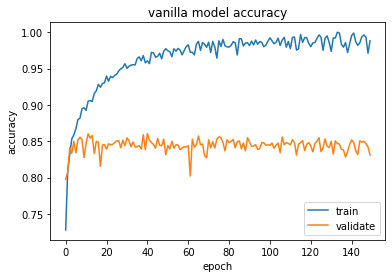

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('vanilla model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='lower right')
plt.show()

This learning curve for the toy dataset looks about right for a vanilla model: getting an okay score but with the training set drastically overfitting. This means that we are ok to continue with these hyperparameters for the official vanilla model on the larger test/validate/train set. 

# Vanilla Model

In this section we will take the hyperparameters found via gridsearching on a smaller dataset in the previous section. 

In [0]:
# Vanilla model multilayer perceptron (MLP)
input_shape = X_train.shape
#set up the sequential model w/ tuned hyperparameters
hidden_layer_1 = 256
hidden_layer_2 = 256
twelve_1 = 0.001
twelve_2 = 0.001
vanilla_model = Sequential([
    Dense(hidden_layer_1, input_shape=(784,), activation='relu',kernel_regularizer=l2(twelve_1)), #hidden layer 1
    Dense(hidden_layer_2, activation='relu', kernel_regularizer=l2(twelve_2)), #hidden layer 2
    Dense(10,activation='softmax')]) #output
vanilla_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
vanilla_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [0]:
history1=vanilla_model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=30,batch_size=32)

Train on 50000 samples, validate on 1000 samples
Epoch 1/30
50000/50000 [==============================] - 5s 94us/step - loss: 0.4109 - accuracy: 0.8755 - val_loss: 0.4136 - val_accuracy: 0.8680
Epoch 2/30
50000/50000 [==============================] - 5s 95us/step - loss: 0.4041 - accuracy: 0.8781 - val_loss: 0.4042 - val_accuracy: 0.8720
Epoch 3/30
50000/50000 [==============================] - 5s 94us/step - loss: 0.4038 - accuracy: 0.8787 - val_loss: 0.4097 - val_accuracy: 0.8790
Epoch 4/30
50000/50000 [==============================] - 5s 94us/step - loss: 0.4010 - accuracy: 0.8771 - val_loss: 0.4169 - val_accuracy: 0.8710
Epoch 5/30
50000/50000 [==============================] - 5s 94us/step - loss: 0.3986 - accuracy: 0.8786 - val_loss: 0.4159 - val_accuracy: 0.8750
Epoch 6/30
50000/50000 [==============================] - 5s 94us/step - loss: 0.3957 - accuracy: 0.8792 - val_loss: 0.4160 - val_accuracy: 0.8620
Epoch 7/30
50000/50000 [==============================] - 5s 94us/ste

In [0]:
score = vanilla_model.evaluate(X_test, y_test)
print("Test loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

10000/10000 [==============================] - 1s 52us/step
Test loss: 0.443
Test Accuracy: 0.862


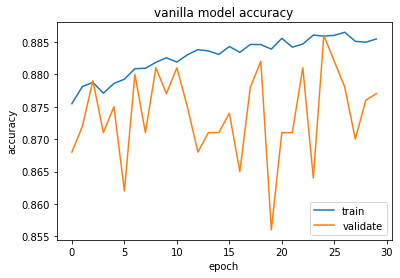

In [0]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('vanilla model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='lower right')
plt.show()

The visualization of the training and validation sets shows that the model is overfitting on the training set. Hopefully by using dropout in the next section we can increase the score of the test set and reduce overfitting.


# Dropout Model

In [0]:
# model using drop out
#compute learning curves (accuracy vs epochs)
#evaluate if using drop-out will help us train a bigger network
#visualize curve

In [0]:
from keras.layers import Dropout

## Comparing 2 different dropout rates

in this section we will use drop-out and evaluate if it helps us to learn a larger network. we will start in this section by comparing two different drop-out rates (20% and 33%) and looking at the learning curves. The best rate will be used in the next section to see if drop out does indeed help us to learn a larger network.

In [0]:
# Dropout model multilayer perceptron (MLP)
#set up the sequential model 
hidden_layer_1 = 256
hidden_layer_2 = 256
twelve_1 = 0.001
twelve_2 = 0.001
dropout_rate1=0.33 #using this dropout rate
dropout_rate2=0.2
third_dropout_model = Sequential([
    Dense(hidden_layer_1, input_shape=(784,), activation='relu',kernel_regularizer=l2(twelve_1)), #hidden layer 1
    Dropout(rate=dropout_rate1),
    Dense(hidden_layer_2, activation='relu', kernel_regularizer=l2(twelve_2)), #hidden layer 2
    Dense(10,activation='softmax')]) #output
third_dropout_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
third_dropout_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [0]:
dropout1_history=third_dropout_model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=60,batch_size=32)

Train on 50000 samples, validate on 1000 samples
Epoch 1/60
50000/50000 [==============================] - 5s 103us/step - loss: 0.5242 - accuracy: 0.8428 - val_loss: 0.4915 - val_accuracy: 0.8580
Epoch 2/60
50000/50000 [==============================] - 5s 103us/step - loss: 0.5210 - accuracy: 0.8437 - val_loss: 0.4796 - val_accuracy: 0.8540
Epoch 3/60
50000/50000 [==============================] - 5s 104us/step - loss: 0.5204 - accuracy: 0.8437 - val_loss: 0.4644 - val_accuracy: 0.8650
Epoch 4/60
50000/50000 [==============================] - 6s 110us/step - loss: 0.5221 - accuracy: 0.8423 - val_loss: 0.4715 - val_accuracy: 0.8520
Epoch 5/60
50000/50000 [==============================] - 5s 109us/step - loss: 0.5236 - accuracy: 0.8430 - val_loss: 0.4575 - val_accuracy: 0.8680
Epoch 6/60
50000/50000 [==============================] - 5s 102us/step - loss: 0.5225 - accuracy: 0.8443 - val_loss: 0.4549 - val_accuracy: 0.8720
Epoch 7/60
50000/50000 [==============================] - 5s 10

In [0]:
# Dropout model multilayer perceptron (MLP)
#set up the sequential model 
hidden_layer_1 = 256
hidden_layer_2 = 256
twelve_1 = 0.001
twelve_2 = 0.001
dropout_rate1=0.33
dropout_rate2=0.2 #using this dropout rate
fifth_dropout_model = Sequential([
    Dense(hidden_layer_1, input_shape=(784,), activation='relu',kernel_regularizer=l2(twelve_1)), #hidden layer 1
    Dropout(rate=dropout_rate2),
    Dense(hidden_layer_2, activation='relu', kernel_regularizer=l2(twelve_2)), #hidden layer 2
    Dense(10,activation='softmax')]) #output
fifth_dropout_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
fifth_dropout_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_18 (Dense)             (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [0]:
dropout2_history=fifth_dropout_model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=60,batch_size=32)

Train on 50000 samples, validate on 1000 samples
Epoch 1/60
50000/50000 [==============================] - 5s 101us/step - loss: 0.4758 - accuracy: 0.8603 - val_loss: 0.4414 - val_accuracy: 0.8710
Epoch 2/60
50000/50000 [==============================] - 5s 98us/step - loss: 0.4823 - accuracy: 0.8570 - val_loss: 0.4240 - val_accuracy: 0.8680
Epoch 3/60
50000/50000 [==============================] - 5s 98us/step - loss: 0.4799 - accuracy: 0.8550 - val_loss: 0.4385 - val_accuracy: 0.8690
Epoch 4/60
50000/50000 [==============================] - 5s 101us/step - loss: 0.4763 - accuracy: 0.8581 - val_loss: 0.4447 - val_accuracy: 0.8690
Epoch 5/60
50000/50000 [==============================] - 5s 107us/step - loss: 0.4786 - accuracy: 0.8570 - val_loss: 0.4632 - val_accuracy: 0.8590
Epoch 6/60
50000/50000 [==============================] - 5s 103us/step - loss: 0.4760 - accuracy: 0.8591 - val_loss: 0.4216 - val_accuracy: 0.8800
Epoch 7/60
50000/50000 [==============================] - 5s 99us

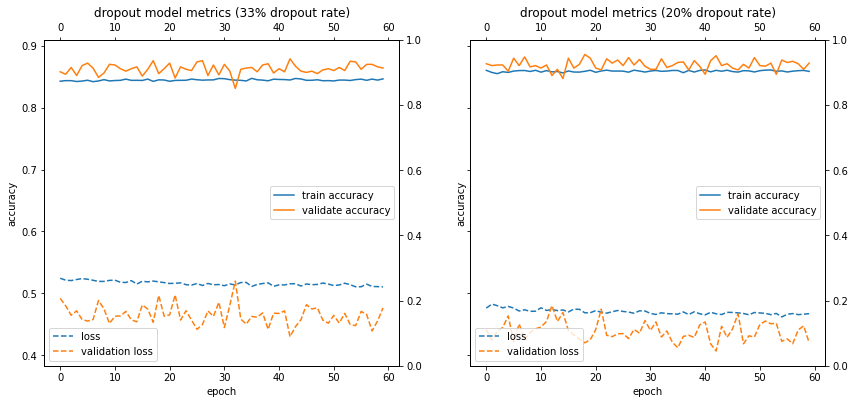

In [0]:
#visualizing the learning curve 
fig2, (axs1,axs2) = plt.subplots(1, 2, figsize=(14,6), sharex=True,sharey=True)
axs1.plot(dropout1_history.history['accuracy'])
axs1.plot(dropout1_history.history['val_accuracy'])

axs1.set_title('dropout model metrics (33% dropout rate)')
axs1.set_ylabel('accuracy')
axs1.set_xlabel('epoch')
axs1.legend(['train accuracy', 'validate accuracy'], loc='center right')
axs15=axs1.twinx()
axs15=axs1.twiny()
axs15.plot(dropout1_history.history['loss'],'--')
axs15.plot(dropout1_history.history['val_loss'],'--')
axs15.set_ylabel("loss")
axs15.legend(['loss', 'validation loss'], loc='lower left')

axs2.plot(dropout2_history.history['accuracy'])
axs2.plot(dropout2_history.history['val_accuracy'])
axs2.set_title('dropout model metrics (20% dropout rate)')
axs2.set_ylabel('accuracy')
axs2.set_xlabel('epoch')
axs2.legend(['train accuracy', 'validate accuracy'], loc='center right')
axs25=axs2.twinx()
axs25=axs2.twiny()
axs25.plot(dropout2_history.history['loss'],'--')
axs25.plot(dropout2_history.history['val_loss'],'--')
axs25.set_ylabel("loss")
axs25.legend(['loss', 'validation loss'], loc='lower left')

fig.tight_layout()

In [0]:
fifth_dropout_score = fifth_dropout_model.evaluate(X_test, y_test)
print("Test loss: {:.3f}".format(fifth_dropout_score[0]))
print("Test Accuracy: {:.3f}".format(fifth_dropout_score[1]))

10000/10000 [==============================] - 1s 55us/step
Test loss: 0.470
Test Accuracy: 0.861


In [0]:
third_dropout_score = third_dropout_model.evaluate(X_test, y_test)
print("Test loss: {:.3f}".format(third_dropout_score[0]))
print("Test Accuracy: {:.3f}".format(third_dropout_score[1]))

10000/10000 [==============================] - 1s 60us/step
Test loss: 0.495
Test Accuracy: 0.852


Using dropout helps the model to overfit less than it did in the vanilla model. Because this is promising, we will now test if the dropout will help us learn a bigger network. Because we know larger dropout size helps to generalize more, and the scores were comparable, we decided to use the 33% dropout rate moving forward.

## Comparing 33% dropout on a deeper model
In this section we will use a 33% dropout rate on a deeper model (4 layers vs the 2 layers of our shallow model) and evaluate. 

In [0]:
# Dropout model multilayer perceptron (MLP)
# Larger network 33% dropout rate
#set up the sequential model 
hidden_layer_size = 256
twelve = 0.001
dropout_rate=0.33 #using this dropout rate
dropout_model_deep = Sequential([
    Dense(hidden_layer_size, input_shape=(784,), activation='relu',kernel_regularizer=l2(twelve)), #hidden layer 1
    Dropout(rate=dropout_rate),
    Dense(hidden_layer_size, activation='relu', kernel_regularizer=l2(twelve)), #hidden layer 2
    Dropout(rate=dropout_rate),
    Dense(hidden_layer_size, activation='relu', kernel_regularizer=l2(twelve)), #hidden layer 3
    Dropout(rate=dropout_rate),
    Dense(hidden_layer_size, activation='relu', kernel_regularizer=l2(twelve)), #hidden layer 4
    Dense(10,activation='softmax')]) #output
dropout_model_deep.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
dropout_model_deep.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 256)              

In [0]:
#training the deep (4-layer) model with 33% dropout rate
dropout_deep_history=dropout_model_deep.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=60,batch_size=32)

Train on 50000 samples, validate on 1000 samples
Epoch 1/60
50000/50000 [==============================] - 6s 125us/step - loss: 0.6230 - accuracy: 0.8284 - val_loss: 0.5383 - val_accuracy: 0.8500
Epoch 2/60
50000/50000 [==============================] - 6s 126us/step - loss: 0.6230 - accuracy: 0.8286 - val_loss: 0.5783 - val_accuracy: 0.8380
Epoch 3/60
50000/50000 [==============================] - 6s 126us/step - loss: 0.6262 - accuracy: 0.8243 - val_loss: 0.5397 - val_accuracy: 0.8720
Epoch 4/60
50000/50000 [==============================] - 6s 125us/step - loss: 0.6245 - accuracy: 0.8293 - val_loss: 0.5553 - val_accuracy: 0.8350
Epoch 5/60
50000/50000 [==============================] - 6s 126us/step - loss: 0.6255 - accuracy: 0.8268 - val_loss: 0.5287 - val_accuracy: 0.8650
Epoch 6/60
50000/50000 [==============================] - 6s 127us/step - loss: 0.6247 - accuracy: 0.8270 - val_loss: 0.5539 - val_accuracy: 0.8450
Epoch 7/60
50000/50000 [==============================] - 6s 12

In [0]:
deep_dropout_score = dropout_model_deep.evaluate(X_test, y_test)
print("Test loss: {:.3f}".format(deep_dropout_score[0]))
print("Test Accuracy: {:.3f}".format(deep_dropout_score[1]))

10000/10000 [==============================] - 1s 63us/step
Test loss: 0.562
Test Accuracy: 0.842


The test accuracy is comparable to the shallow model with the same dropout rate. This deeper model at 33% dropout was trained with 1. 30 epochs and 2. 60 epochs (shown here). Both graphs will be shown below along with the shallow model at 33% for comparison. both are included to show the overall trend and a higher resolution look at the training. 

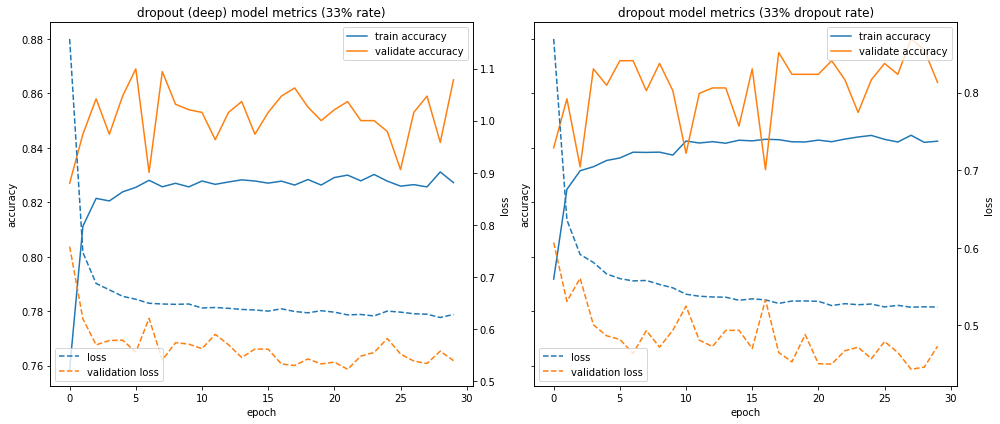

In [0]:
#training on 30 epochs
fig3, (axs3,axs1) = plt.subplots(1, 2, figsize=(14,6),sharex=True,sharey=True)

#shallow network
axs1.plot(dropout1_history.history['accuracy'])
axs1.plot(dropout1_history.history['val_accuracy'])
axs15=axs1.twinx()
axs15.plot(dropout1_history.history['loss'],'--')
axs15.plot(dropout1_history.history['val_loss'],'--')
axs1.set_title('dropout model metrics (33% dropout rate)')
axs1.set_ylabel('accuracy')
axs15.set_ylabel("loss")
axs1.set_xlabel('epoch')
axs1.legend(['train accuracy', 'validate accuracy'], loc='upper right')
axs15.legend(['loss', 'validation loss'], loc='lower left')

#deep network
axs3.plot(dropout_deep_history.history['accuracy'])
axs3.plot(dropout_deep_history.history['val_accuracy'])
axs3.set_title('dropout (deep) model metrics (33% rate)')
axs3.set_ylabel('accuracy')
axs3.set_xlabel('epoch')
axs3.legend(['train accuracy', 'validate accuracy'], loc='upper right')
axs35=axs3.twinx()
axs35.plot(dropout_deep_history.history['loss'],'--')
axs35.plot(dropout_deep_history.history['val_loss'],'--')
axs35.set_ylabel("loss")
axs35.legend(['loss', 'validation loss'], loc='lower left')

fig3.tight_layout()

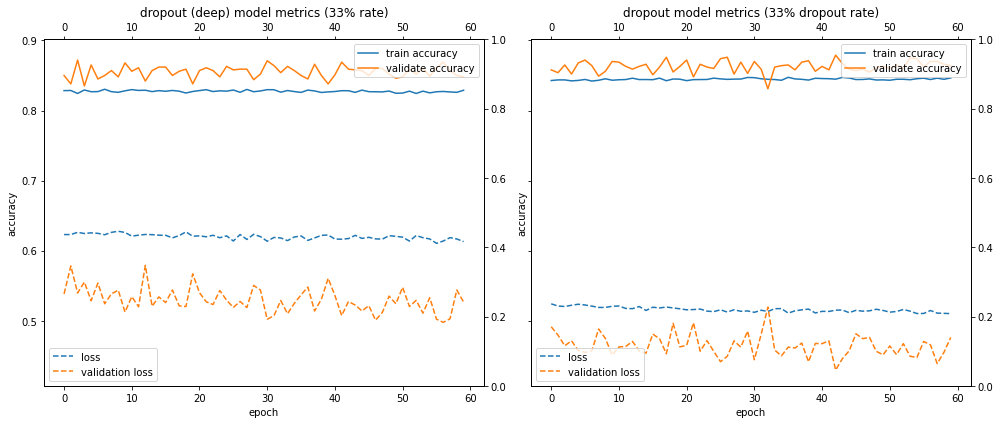

In [0]:
#training on 60 epochs
fig3, (axs3,axs1) = plt.subplots(1, 2, figsize=(14,6),sharex=True,sharey=True)

#shallow network
axs1.plot(dropout1_history.history['accuracy'])
axs1.plot(dropout1_history.history['val_accuracy'])
axs15=axs1.twinx()
axs15=axs1.twiny()
axs15.plot(dropout1_history.history['loss'],'--')
axs15.plot(dropout1_history.history['val_loss'],'--')
axs1.set_title('dropout model metrics (33% dropout rate)')
axs1.set_ylabel('accuracy')
axs15.set_ylabel("loss")
axs1.set_xlabel('epoch')
axs1.legend(['train accuracy', 'validate accuracy'], loc='upper right')
axs15.legend(['loss', 'validation loss'], loc='lower left')

#deep network
axs3.plot(dropout_deep_history.history['accuracy'])
axs3.plot(dropout_deep_history.history['val_accuracy'])
axs3.set_title('dropout (deep) model metrics (33% rate)')
axs3.set_ylabel('accuracy')
axs3.set_xlabel('epoch')
axs3.legend(['train accuracy', 'validate accuracy'], loc='upper right')
axs35=axs3.twinx()
axs35=axs3.twiny()
axs35.plot(dropout_deep_history.history['loss'],'--')
axs35.plot(dropout_deep_history.history['val_loss'],'--')
axs35.set_ylabel("loss")
axs35.legend(['loss', 'validation loss'], loc='lower left')

fig3.tight_layout()

The dropout model did help to learn a larger network, but has a slightly higher loss through training and validation.

# Batch Normalization model
in this section we will look at Batch Normalization. We will compare the scores and learning curves of models that used batch normalized vs. those that did not. we will therefore train (1) batch normalization model with dropout and (2) batch normalization without dropout. Also, due to the nature of batch normalization and its ability to accelerate the learning process we trained it on the deeper model for added challenge.

In [0]:
#batch normalization model 
#visualize curve
#compare
from keras.layers import BatchNormalization

In [0]:
# Batch Normalization model multilayer perceptron (MLP)
# MODEL 1: Batch Normalization + Dropout 
#set up the sequential 4-layer model 
hidden_layer_size = 256
twelve = 0.001
dropout_rate=0.2
batch_model = Sequential([
    Dense(hidden_layer_size, input_shape=(784,), activation='relu',kernel_regularizer=l2(twelve)), #hidden layer 1
    Dropout(rate=dropout_rate),
    BatchNormalization(),
    Dense(hidden_layer_size, activation='relu', kernel_regularizer=l2(twelve)), #hidden layer 2
    Dropout(rate=dropout_rate),
    BatchNormalization(),
    Dense(hidden_layer_size, activation='relu', kernel_regularizer=l2(twelve)), #hidden layer 3
    Dropout(rate=dropout_rate),
    BatchNormalization(),
    Dense(hidden_layer_size, activation='relu', kernel_regularizer=l2(twelve)), #hidden layer 4
    Dense(10,activation='softmax')]) #output
batch_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
batch_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_25 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dense_26 (Dense)             (None, 256)              

In [0]:
#train batch normalization + dropout
batch_history=batch_model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=60,batch_size=32)

Train on 50000 samples, validate on 1000 samples
Epoch 1/60
50000/50000 [==============================] - 11s 218us/step - loss: 1.3977 - accuracy: 0.7670 - val_loss: 0.9193 - val_accuracy: 0.8350
Epoch 2/60
50000/50000 [==============================] - 10s 209us/step - loss: 0.8809 - accuracy: 0.8011 - val_loss: 0.7256 - val_accuracy: 0.8250
Epoch 3/60
50000/50000 [==============================] - 10s 207us/step - loss: 0.7525 - accuracy: 0.8026 - val_loss: 0.5949 - val_accuracy: 0.8540
Epoch 4/60
50000/50000 [==============================] - 10s 206us/step - loss: 0.7140 - accuracy: 0.8059 - val_loss: 0.5927 - val_accuracy: 0.8500
Epoch 5/60
50000/50000 [==============================] - 10s 206us/step - loss: 0.7284 - accuracy: 0.8005 - val_loss: 0.5980 - val_accuracy: 0.8480
Epoch 6/60
50000/50000 [==============================] - 11s 212us/step - loss: 0.6943 - accuracy: 0.8074 - val_loss: 0.5939 - val_accuracy: 0.8400
Epoch 7/60
50000/50000 [==============================] -

In [0]:
# Batch Normalization model multilayer perceptron (MLP)
# MODEL 2: Batch Normalization (NO dropout)
#set up the 4-layer sequential model 
hidden_layer_size = 256
twelve = 0.001
batch_model2 = Sequential([
    Dense(hidden_layer_size, input_shape=(784,), activation='relu',kernel_regularizer=l2(twelve)), #hidden layer 1
    BatchNormalization(),
    Dense(hidden_layer_size, activation='relu', kernel_regularizer=l2(twelve)), #hidden layer 2
    BatchNormalization(),
    Dense(hidden_layer_size, activation='relu', kernel_regularizer=l2(twelve)), #hidden layer 3
    BatchNormalization(),
    Dense(hidden_layer_size, activation='relu', kernel_regularizer=l2(twelve)), #hidden layer 4
    Dense(10,activation='softmax')]) #output
batch_model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
batch_model2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
dense_30 (Dense)             (None, 256)               65792     
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
dense_31 (Dense)             (None, 256)               65792     
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)               1024      
_________________________________________________________________
dense_32 (Dense)             (None, 256)              

In [0]:
#train batch normalization alone
batch_history2=batch_model2.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=60,batch_size=32)

Train on 50000 samples, validate on 1000 samples
Epoch 1/60
50000/50000 [==============================] - 10s 207us/step - loss: 1.2528 - accuracy: 0.8061 - val_loss: 1.0343 - val_accuracy: 0.7460
Epoch 2/60
50000/50000 [==============================] - 10s 200us/step - loss: 0.7368 - accuracy: 0.8304 - val_loss: 0.6659 - val_accuracy: 0.8250
Epoch 3/60
50000/50000 [==============================] - 10s 197us/step - loss: 0.6205 - accuracy: 0.8377 - val_loss: 0.5596 - val_accuracy: 0.8580
Epoch 4/60
50000/50000 [==============================] - 10s 198us/step - loss: 0.5739 - accuracy: 0.8433 - val_loss: 0.5631 - val_accuracy: 0.8450
Epoch 5/60
50000/50000 [==============================] - 10s 200us/step - loss: 0.5503 - accuracy: 0.8461 - val_loss: 0.5550 - val_accuracy: 0.8360
Epoch 6/60
50000/50000 [==============================] - 10s 201us/step - loss: 0.5273 - accuracy: 0.8532 - val_loss: 0.4932 - val_accuracy: 0.8700
Epoch 7/60
50000/50000 [==============================] -

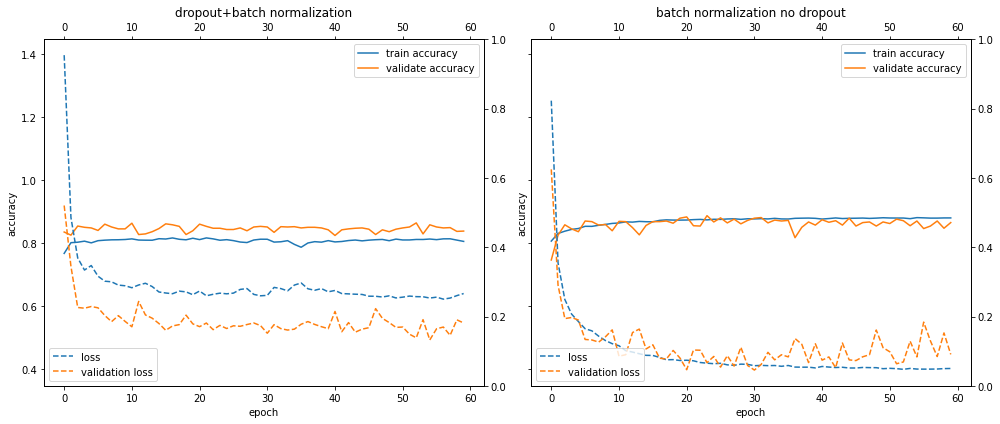

In [0]:
fig4, (axs3,axs1) = plt.subplots(1, 2, figsize=(14,6),sharex=True,sharey=True)

#Batch Normalization *NO* Dropout
axs1.plot(batch_history2.history['accuracy'])
axs1.plot(batch_history2.history['val_accuracy'])
axs15=axs1.twinx()
axs15=axs1.twiny()
axs15.plot(batch_history2.history['loss'],'--')
axs15.plot(batch_history2.history['val_loss'],'--')
axs1.set_title('batch normalization no dropout')
axs1.set_ylabel('accuracy')
axs15.set_ylabel("loss")
axs1.set_xlabel('epoch')
axs1.legend(['train accuracy', 'validate accuracy'], loc='upper right')
axs15.legend(['loss', 'validation loss'], loc='lower left')

#Batch Normalization + Drropout 
axs3.plot(batch_history.history['accuracy'])
axs3.plot(batch_history.history['val_accuracy'])
axs3.set_title('dropout+batch normalization')
axs3.set_ylabel('accuracy')
axs3.set_xlabel('epoch')
axs3.legend(['train accuracy', 'validate accuracy'], loc='upper right')
axs35=axs3.twinx()
axs35=axs3.twiny()
axs35.plot(batch_history.history['loss'],'--')
axs35.plot(batch_history.history['val_loss'],'--')
axs35.set_ylabel("loss")
axs35.legend(['loss', 'validation loss'], loc='lower left')

fig4.tight_layout()

Batch normalization no dropout is the better performer, with a lower loss and also a closer matching triaining and validation dataset. Therfore we will use it to test the accuracy and loss of batch normalization.

In [0]:
batchnormalization_score = batch_model2.evaluate(X_test, y_test)
print("Test loss: {:.3f}".format(batchnormalization_score[0]))
print("Test Accuracy: {:.3f}".format(batchnormalization_score[1]))

10000/10000 [==============================] - 1s 80us/step
Test loss: 0.494
Test Accuracy: 0.850


# Best Model

In [0]:
models_tested = ['vanilla','1/3 dropout (shallow)','1/5 dropout (shallow)','1/3 dropout (deep)','batch normalization']
model_accuracy=[score[1],third_dropout_score[1],fifth_dropout_score[1],deep_dropout_score[1],batchnormalization_score[1]]
model_loss = [score[0],third_dropout_score[0],fifth_dropout_score[0],deep_dropout_score[0],batchnormalization_score[0]]

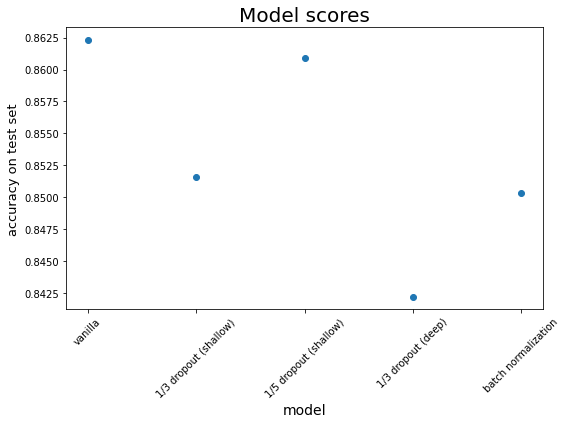

In [0]:
plt.figure(figsize=(8,6))
plt.scatter(x=models_tested,y=model_accuracy)
plt.title('Model scores',fontsize=20)
plt.ylabel('accuracy on test set',fontsize=13)
plt.xlabel('model',fontsize=14)
plt.xticks(models_tested,models_tested,rotation=45)
plt.tight_layout()

# Conclusions

All of the models had a similar score with a range of 0.02 . By using Batch normalization the model was able to train faster, and through using dropout the model overfit much less.  